In [392]:
from skimage import io, img_as_ubyte
from skimage.color import rgb2gray
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
import random

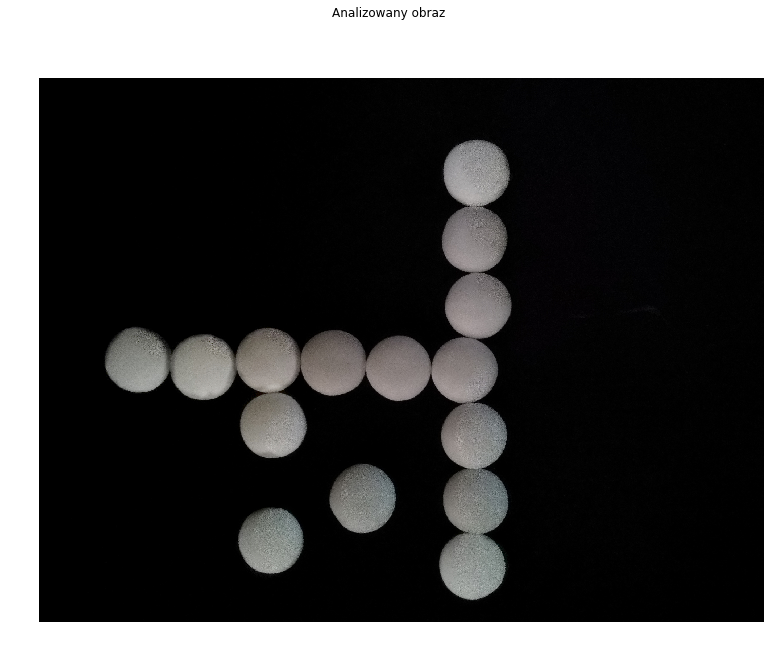

In [393]:
img = io.imread('mentosy/img12.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.suptitle('Analizowany obraz')
plt.show()

In [394]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()
    
def showImg(img, title="Obraz", size=(10,10)):
    plt.imshow(img, cmap="gray")
    plt.axis('off')
    plt.suptitle(title)
    plt.show()

In [395]:
#Segmentacja i scalanie obiektów 
def segmentuj(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):
            if img[i][j] != 255.0:
                if img[i][j] == 0.0:
                    img[i][j] = random.randint(1, 254)
                    if img[i-1][j-1] != 0.0 and img[i-1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i-1][j] != 0.0 and img[i-1][j] != 255.0:
                        img[i][j] = img[i-1][j]
                    elif img[i-1][j+1] != 0.0 and img[i-1][j+1] != 255.0:
                        img[i][j] = img[i-1][j+1]
                    elif img[i][j-1] != 0.0 and img[i][j-1] != 255.0:
                        img[i][j] = img[i][j-1]
                    elif img[i][j+1] != 0.0 and img[i][j+1] != 255.0:
                        img[i][j] = img[i][j+1]
                    elif img[i+1][j-1] != 0.0 and img[i+1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i+1][j] != 0.0 and img[i+1][j] != 255.0:
                        img[i][j] = img[i+1][j]
                    elif img[i+1][j+1] != 0.0 and img[i+1][j+1] != 255.0:
                        img[i][j] = img[i+1][j+1]
                    else:
                        continue
                    #scalanie obiektów
                if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255.0:
                    img[i][j] = img[i-1][j-1]
                    
                elif img[i][j] != img[i-1][j] and img[i-1][j] != 255.0:
                    img[i][j] = img[i-1][j]
                    
                elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255.0:
                    img[i-1][j+1] = img[i][j]
                    
                elif img[i][j] != img[i][j-1] and img[i][j-1] != 255.0:
                    img[i][j-1] = img[i][j]
                    
                elif img[i][j] != img[i][j+1] and img[i][j+1] != 255.0:
                    img[i][j+1] = img[i][j]
                    
                elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255.0:
                    img[i][j] = img[i+1][j-1]
                    
                elif img[i][j] != img[i+1][j] and img[i+1][j] != 255.0:
                    img[i][j] = img[i+1][j]
                elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255.0:
                    img[i][j] = img[i+1][j+1]
                else:
                    continue
    return img


def scal(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):   
            if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255:
                img[i][j] = img[i-1][j-1]

            elif img[i][j] != img[i-1][j] and img[i-1][j] != 255:
                img[i][j] = img[i-1][j]

            elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255:
                img[i-1][j+1] = img[i][j]

            elif img[i][j] != img[i][j-1] and img[i][j-1] != 255:
                img[i][j-1] = img[i][j]

            elif img[i][j] != img[i][j+1] and img[i][j+1] != 255:
                img[i][j+1] = img[i][j]

            elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255:
                img[i][j] = img[i+1][j-1]

            elif img[i][j] != img[i+1][j] and img[i+1][j] != 255:
                img[i][j] = img[i+1][j]
            elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255:
                img[i][j] = img[i+1][j+1]
            else:
                continue
                
    return img

In [ ]:
#obliczanie ile procent danego obrazu zajmują obiekty
def ile_procent(img, back, obj):
    obiekt = 0
    tlo = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == back:
                tlo += 1
            elif img[i][j] == obj:
                obiekt += 1
    return (obiekt/tlo)*100

def ile_px(img, kolor):
    obiekt = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != kolor:
                obiekt += 1
    return obiekt;

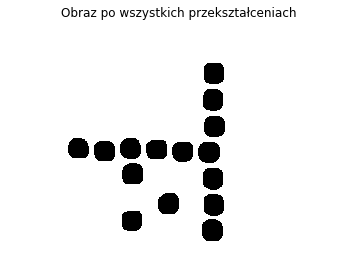

Obiekty na tym obrazie zajmują powierzchnię: 382795 px, co stanowi 14.63 % całego obrazu.


In [ ]:
image = img_as_ubyte(rgb2gray(img))#najpierw zmiana na obraz w odcieniach szarości, następnie na wartości 0-255
th = 150 
kernel = np.ones((3,3),np.uint8)

th, bimm = cv2.threshold(image, thresh=th, maxval=255, type=cv2.THRESH_OTSU)#binaryzacja obrazu wejściowego metodą OTSU  
mbim = cv2.medianBlur(bimm,  11)#filtr medianowy

dt = cv2.distanceTransform(mbim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)#transformata odległościowa

th = 45
th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)#ponowna binaryzacja aby obiekty miały wartość 255
bimm = cv2.erode(bim, kernel=kernel, iterations=25)#operacja erozji

showImg(bimm, title='Obraz po wszystkich przekształceniach', size=(25,25))

ile_px_start = ile_px(mbim, 0)
ile_startowy = ile_procent(mbim, 0, 255)
print('Obiekty na tym obrazie zajmują powierzchnię:', ile_px_start,'px, co stanowi %.2f' % ile_startowy, "% całego obrazu.")

In [ ]:
#Liczenie ilości obiektów na obrazie
def licz_obiekty(img):
    ile_obiektow = 0
    obiekty = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != 255:
                obiekty.append(img[i][j])
    ile_obiektow = len(list(set(obiekty)))# zlicza niepowtarzające się elementy listy
    return ile_obiektow

0
34
18


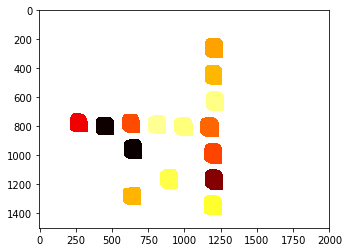

Obiektów według mojej segmentacji jest:	 15


In [ ]:
nimg = segmentuj(bimm)
tmp = 0
ile = licz_obiekty(nimg)

while tmp != ile:
    print(tmp)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    #print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()
    
print("Obiektów według mojej segmentacji jest:\t", ile)

In [ ]:
print('Prog binaryzacji: ', th)
binary = bim < th

label_objects, nb_labels = ndi.label(binary)

print("Obiektów na obrazie wg funkcji wbudowanych jest:\t",nb_labels)

Prog binaryzacji:  45.0
Obiektów na obrazie wg funkcji wbudowanych jest:	 15


In [ ]:
if ile == nb_labels:
    print("Segmentacja stworzona przeze mnie dobrze obliczyła ilość obiektów.")
else:
    print("Segmentacja stworzona przeze mnie źle obliczyła ilość obiektów.")

Segmentacja stworzona przeze mnie dobrze obliczyła ilość obiektów.


In [ ]:
#Poniższe funkcje zostały wykorzystane na podstawie notatek udostępnionych przez dr Marcina Piekarczyka
#udostępnionych w ramach kursu "Przetwarzanie obrazów cyfrowych".

def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]

def computeBB(points):
    
    s = len(points)
    my,mx = cog2(points)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)

In [ ]:
x = 0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    x = x + 1
    print('\t\tObiekt nr: ', x ,'\n\nLiczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nWspółczynnik Blaira-Blissa: ', bb,'\nWspółczynnik Fereta: ',feret, '\n\n\n')

ile_px_koniec = np.sum(len(pts))
ile_proc_straty = 100-((ile_px_koniec * 100) / ile_px_start)
print('Obiekty na tym obrazie zajmują powierzchnię:', ile_px_koniec,'px, co stanowi stratę %.2f' % ile_proc_straty, "% przybliżonej wielkości z obrazu wejściowego.")

		Obiekt nr:  1 

Liczba punktow:  6876 
Srodek ciezkosci:  [262.141506689936, 1205.5657358929611] 
Współczynnik Blaira-Blissa:  0.9992082100455734 
Współczynnik Fereta:  1.054945054945055 



		Obiekt nr:  2 

Liczba punktow:  6567 
Srodek ciezkosci:  [445.55063194761686, 1200.148012791229] 
Współczynnik Blaira-Blissa:  0.9969056970617227 
Współczynnik Fereta:  1.1494252873563218 



		Obiekt nr:  3 

Liczba punktow:  6520 
Srodek ciezkosci:  [628.1628834355828, 1210.635736196319] 
Współczynnik Blaira-Blissa:  0.9991118069325761 
Współczynnik Fereta:  1.0326086956521738 



		Obiekt nr:  4 

Liczba punktow:  5511 
Srodek ciezkosci:  [781.4574487388859, 271.69660678642714] 
Współczynnik Blaira-Blissa:  0.9943637221682768 
Współczynnik Fereta:  0.9772727272727273 



		Obiekt nr:  5 

Liczba punktow:  5850 
Srodek ciezkosci:  [780.6875213675214, 631.3974358974359] 
Współczynnik Blaira-Blissa:  0.9967882787615198 
Współczynnik Fereta:  0.9891304347826086 



		Obiekt nr:  6 

Liczba punk